<a href="https://colab.research.google.com/github/victoroliveira202004849/lia1_2024_1/blob/main/Aula8_datasheet-Funcionando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Fashion-Mnist
Problema: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando categorias de roupas

## Fonte de dados

O conjunto de dados Fashion-MNIST consiste em 60.000 imagens em tons de cinza (28x28) de artigos de moda em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

In [15]:
# Conexão com o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
nomes_classes = ['Camiseta/Topo', 'Calça', 'Pulôver', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota de tornozelo']

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [5]:
def visualiza_imagens(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

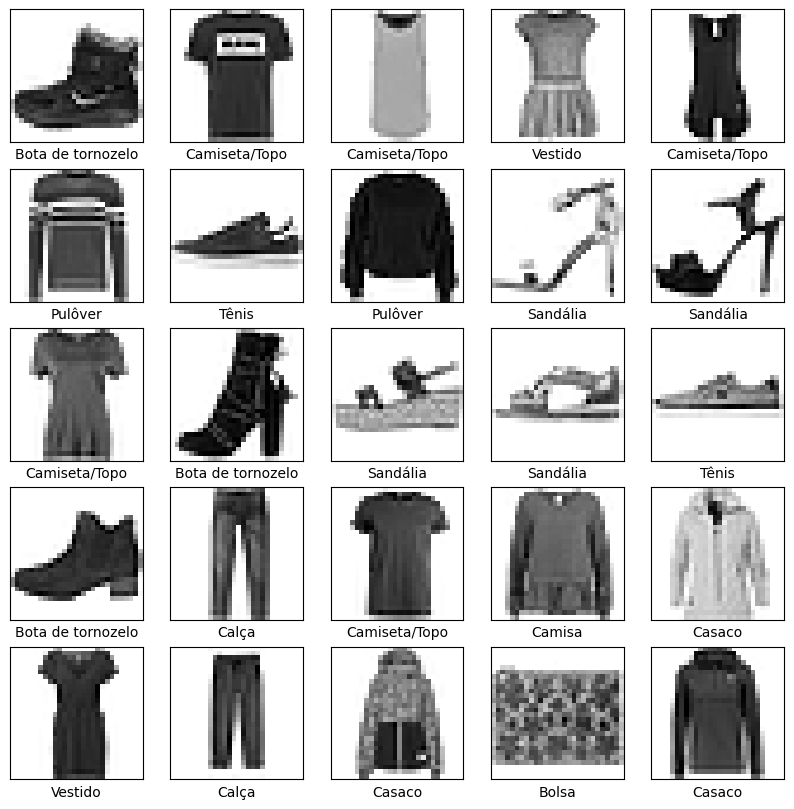

In [6]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino, nomes_classes)

In [7]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [9]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

In [10]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 15,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/15
1875/1875 [==============================] - 56s 29ms/step - loss: 0.5946 - accuracy: 0.7825 - val_loss: 0.4330 - val_accuracy: 0.8408
Epoch 2/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3993 - accuracy: 0.8541 - val_loss: 0.3872 - val_accuracy: 0.8588
Epoch 3/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3475 - accuracy: 0.8729 - val_loss: 0.3745 - val_accuracy: 0.8634
Epoch 4/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3087 - accuracy: 0.8860 - val_loss: 0.3286 - val_accuracy: 0.8799
Epoch 5/15
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2826 - accuracy: 0.8962 - val_loss: 0.3142 - val_accuracy: 0.8878
Epoch 6/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2597 - accuracy: 0.9054 - val_loss: 0.3205 - val_accuracy: 0.8873
Epoch 7/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2422 - accuracy: 0.9091 - val_loss: 0.3036 -

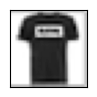

In [17]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/drive/MyDrive/ImagensIA/camisa.png")

# Redimensiona para 28x28 pixels
# Converte para escala de cinza
nova_imagem = nova_imagem.convert('L')
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')  # Specify cmap='gray' to display grayscale image
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [19]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 226ms/step


In [20]:
print(previsoes)

[[3.1735473e-03 5.3387269e-04 6.2994838e-02 9.3859757e-07 6.2584068e-04
  5.5125943e-10 1.9187240e-04 8.4862972e-10 9.3247908e-01 5.1092020e-09]]


In [21]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [22]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Bolsa
